In [1]:
import pandas as pd
from os import walk
import os
import nltk
import pandas as pd
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from utils import * 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/janjaniszewski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janjaniszewski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janjaniszewski/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./Data/TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding="utf8")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,HRV,"Mr President, Excellencies\nAll protocol obser..."
8477,75,2020,GAB,"Mr. President, Majesties,\nLadies and Gentleme..."
8478,75,2020,MCO,"Mr. President of the General Assembly,\nMr. Se..."
8479,75,2020,AND,"Mr. President,\nMr. Secretary General,\nYour E..."
8480,75,2020,BHR,"In the name of Allah, the most gracious, the m..."


In [3]:
df_speech.to_pickle('./Data/Throughput/Speeches_original.pickle')

In [42]:
preprocessing_steps = ['prep_lower', 
                             'prep_tokenizewords', 
                             'prep_drop_sentenceindicators', 
                             'prep_drop_numbers', 
                             'prep_drop_stopwords',
                       'prep_listtosentence'
                      ]


In [43]:
#df_speech = df_speech.set_index(['Session', 'Year', 'ISO-alpha3 Code'])
df_speech['speech'] = preprocess(df_speech['Speech'], preprocessing_steps)

In [44]:
df_speech.to_pickle('./Data/Throughput/Speeches_preprocessed.pickle')

In [45]:
df_happy = pd.read_excel('./Data/DataForTable2.1.xls')
df_happy = df_happy.rename({'year': 'Year'}, axis=1)
df_mapping = pd.read_csv('./Data/mapping_countries.csv')[['Country name', 'ISO-alpha3 Code']]

In [46]:
pd_final = pd.merge(pd.merge(df_happy, df_mapping, on='Country name'), df_speech, on=['ISO-alpha3 Code', 'Year'])

In [47]:
pd_final.to_pickle('./Data/Throughput/Speeches_processed_Happiness.pickle')

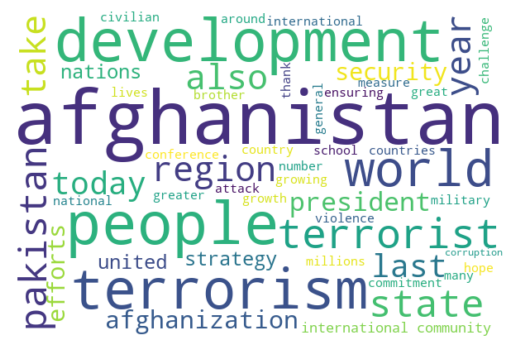